Unnamed: 0      int64
cfo_demod     float64
gain_imb      float64
iq_imb        float64
or_off        float64
quadr_err     float64
m_power       float64
ph_err        float64
mag_err       float64
evm           float64
Tosc          float64
Tmix          float64
dtype: object
Unnamed: 0    0
cfo_demod     0
gain_imb      0
iq_imb        0
or_off        0
quadr_err     0
m_power       0
ph_err        0
mag_err       0
evm           0
Tosc          0
Tmix          0
dtype: int64
12


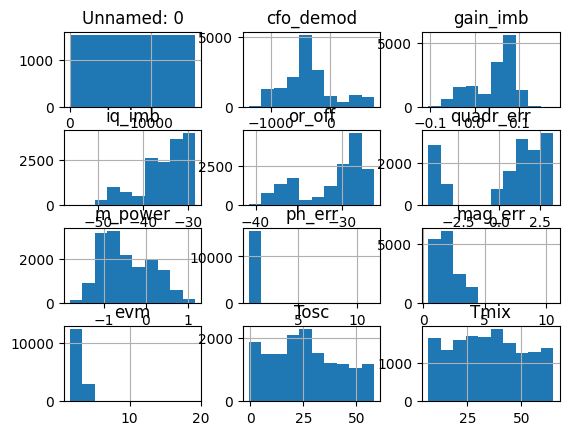

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd


#Loading of our datasets
dataset_x_train = pd.read_csv('/content/x_train.csv')
dataset_y_train = pd.read_csv('/content/y_train.csv')

# Part 1 - Data Examination
#What data types do we have in our dataset? 
print(dataset_x_train.dtypes)

#Are there any missing values? 
print(dataset_x_train.isna().sum())

#How is the data distributed ?
dataset_x_train.hist()

#How many features in our dataset ?
print(dataset_x_train.shape[1])





In [5]:
# Load the libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
from google.colab import files
from scipy import stats
from keras.optimizers import Adam
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


In [6]:
#Part 2 -  Data preprocessing

#Drop the columns which are not for use
columns_to_drop=['Unnamed: 0','m_power','Tosc', 'Tmix']
dataset_x_train = dataset_x_train.drop(columns_to_drop, axis=1)

# Outliers removal
dataset_x_train = dataset_x_train[(np.abs(stats.zscore(dataset_x_train)) < 3).all(axis=1)]

#Scaling of the features
num_cols = ['cfo_demod', 'gain_imb', 'iq_imb', 
            'or_off', 'quadr_err','ph_err', 'mag_err', 'evm']
scaler = StandardScaler()
dataset_x_train[num_cols] = scaler.fit_transform(dataset_x_train[num_cols])

# Split the dataset into training and validation sets
X = dataset_x_train.iloc[:, :-1].values
y = dataset_x_train.iloc[:, -1].values
y = y.astype(int)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert target labels to binary encoded format
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val = lb.transform(y_val)






Epoch 1/30
1021/1021 [==============================] - 5s 4ms/step - loss: 0.3983 - accuracy: 0.9115 - val_loss: 0.2198 - val_accuracy: 0.9344
Epoch 2/30
1021/1021 [==============================] - 3s 3ms/step - loss: 0.2074 - accuracy: 0.9309 - val_loss: 0.1832 - val_accuracy: 0.9403
Epoch 3/30
1021/1021 [==============================] - 3s 3ms/step - loss: 0.1855 - accuracy: 0.9335 - val_loss: 0.1653 - val_accuracy: 0.9445
Epoch 4/30
1021/1021 [==============================] - 3s 3ms/step - loss: 0.1734 - accuracy: 0.9384 - val_loss: 0.1589 - val_accuracy: 0.9438
Epoch 5/30
1021/1021 [==============================] - 3s 3ms/step - loss: 0.1659 - accuracy: 0.9400 - val_loss: 0.1511 - val_accuracy: 0.9465
Epoch 6/30
1021/1021 [==============================] - 4s 3ms/step - loss: 0.1617 - accuracy: 0.9416 - val_loss: 0.1464 - val_accuracy: 0.9471
Epoch 7/30
1021/1021 [==============================] - 2s 2ms/step - loss: 0.1557 - accuracy: 0.9410 - val_loss: 0.1505 - val_accuracy:

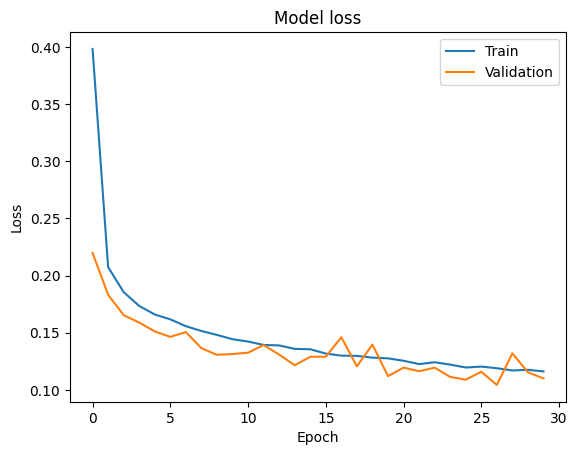

In [7]:
# Partie 3 -  Model building and Model training

#Model Building
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(y_train.shape[1], activation='softmax'))

#Model Compilatio
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Model training
history = model.fit(X_train, y_train, epochs=30, batch_size=12, validation_data=(X_val, y_val))

#Model evaluation
loss, accuracy = model.evaluate(X_val, y_val)

print("Validation loss:", loss)
print("Validation accuracy:", accuracy)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()




In [8]:
# Part 4 - Performance tunning

# Build the new model 
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the new model
optimizer = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the new model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), verbose=0)

# Evaluate the new model on validation data
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation loss:", loss)
print("Validation accuracy:", accuracy)






96/96 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.9559
Validation loss: 0.12909503281116486
Validation accuracy: 0.9559255838394165


In [15]:
#Part 5-  Model evaluation

# Load the dataset
dataset_x_test = pd.read_csv('/content/x_test.csv')

# Drop columns not used in testing
columns_to_drop=['Unnamed: 0','m_power','Tosc', 'Tmix']
dataset_x_test = dataset_x_test.drop(columns_to_drop, axis=1)

#Scaling of features
num_cols = dataset_x_test.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
dataset_x_test[num_cols] = scaler.fit_transform(data_test[num_cols])


#Features/labels separation
X_test = dataset_x_test.iloc[:, :-1].values
y_test = dataset_x_test.iloc[:, -1].values.astype(int)

# Convert target labels to binary encoded format
lb = LabelBinarizer()
y_test = lb.fit_transform(y_test)

# Split the dataset into testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=0)

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_test.shape[1]))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(y_test.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_test, y_test, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

# Evaluate the model on testing data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


X_test_pred = model.predict(data_test.iloc[:, :-1])
X_test_pred = X_test_pred.reshape(-1, y_test.shape[1])
X_test_pred = np.argmax(X_test_pred, axis=1)

# Save predictions to CSV file
result_test = pd.DataFrame({'id': np.arange(len(X_test_pred)), 'target': X_test_pred})
result_test.to_csv('test_result.csv', index=False)

Epoch 1/100
48/48 [==============================] - 1s 7ms/step - loss: 2.0691 - accuracy: 0.7103 - val_loss: 1.2638 - val_accuracy: 0.7917
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.9073 - accuracy: 0.8545 - val_loss: 0.7266 - val_accuracy: 0.9115
Epoch 3/100
48/48 [==============================] - 0s 4ms/step - loss: 0.6205 - accuracy: 0.9385 - val_loss: 0.5827 - val_accuracy: 0.9193
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5035 - accuracy: 0.9424 - val_loss: 0.4923 - val_accuracy: 0.9219
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.9440 - val_loss: 0.4296 - val_accuracy: 0.9258
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3667 - accuracy: 0.9499 - val_loss: 0.3786 - val_accuracy: 0.9323
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3234 - accuracy: 0.9505 - val_loss: 0.3436 - val_accuracy: 0.9427
Epoch 8/100
4

In [10]:
#Part 6-  Compare MLP to SVM

# Split the dataset into training and validation sets
X = dataset_x_train.iloc[:, :-1].values
y = dataset_x_train.iloc[:, -1].values
y = y.astype(int)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Build and train the SVM model with different hyperparameters

svm = SVC(kernel='rbf', C=1, gamma='scale')
start_time = time.time()
svm.fit(X_train, y_train)
end_time = time.time()

#SVM results
y_pred_svm = svm.predict(X_val)
svm_accuracy = accuracy_score(y_val, y_pred_svm)
training_time = end_time - start_time

print("SVM accuracy:", svm_accuracy)
print("SVM training time:", training_time)


# Train an MLP model with the same architecture and hyperparameters as in your code

mlp = MLPClassifier(hidden_layer_sizes=(64,32), activation='relu', solver='adam', alpha=0.01, batch_size=32, max_iter=500, validation_fraction=0.2)
start_time = time.time()
mlp.fit(X_train, y_train)


#MLP results

y_pred_mlp = mlp.predict(X_val)
mlp_accuracy = accuracy_score(y_val, y_pred_mlp)
print("MLP accuracy:", mlp_accuracy)
print("MLP training time:", time.time()-start_time)

SVM accuracy: 0.9657198824681684
SVM training time: 1.0167765617370605
MLP accuracy: 0.9696376101860921
MLP training time: 34.22051692008972


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Number of features: 1 Validation MSE: 0.06580857187509537
Number of features: 3 Validation MSE: 0.019509021192789078
Number of features: 5 Validation MSE: 0.021147137507796288
Number of features: 7 Validation MSE: 0.020037522539496422


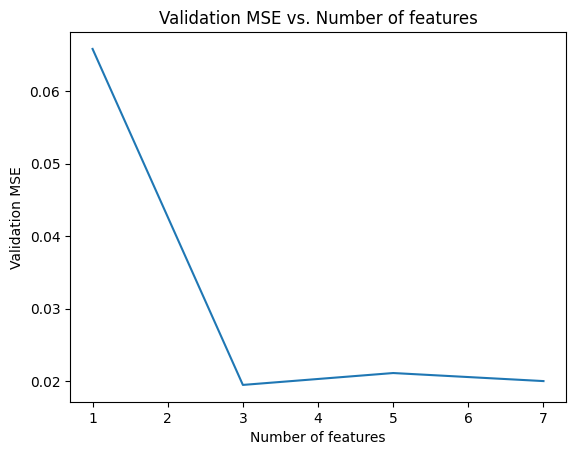

In [11]:
#Part 7-  Feature engineering
!pip install scikeras

# Split into training and validation sets
X_train = dataset_x_train.iloc[:, :-1].values
y_train = dataset_x_train.iloc[:, -1].values

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

#RandomForest features selection
clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
sfm = SelectFromModel(clf, threshold=0.1)

#Number of features studied
n_features = [1, 3, 5, 7]
val_list = []

for n in n_features:
  sfm = SelectFromModel(clf, threshold='mean', max_features=n)
  sfm.fit(X_train, y_train)
  X_train_new = sfm.transform(X_train)
  X_val_new = sfm.transform(X_val)

#Model Building
  model = Sequential()
  model.add(Dense(64, activation='relu', input_dim=X_train_new.shape[1]))
  model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
  model.add(Dense(1, activation='linear'))

#Model compilation
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

#Model training
  history = model.fit(X_train_new, y_train, epochs=100, batch_size=64, validation_data=(X_val_new, y_val), verbose=0)

#Model evaluation
  val_ev_mse, val_metric = model.evaluate(X_val_new, y_val, verbose=0)
  val_list.append(val_ev_mse)
  print("Number of features:", n, "Validation MSE:", val_ev_mse)

plt.plot(n_features, val_list)
plt.title('Validation MSE vs. Number of features')
plt.ylabel('Validation MSE')
plt.xlabel('Number of features')
plt.show()